In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [128]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    episode = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    tuple_episode = []
    sn = 0
    for i in range(num_episodes):
        observation = env.reset()
        episode = []
        while True:
            action = policy(observation)
            next_observation ,reward , done_ , _ = env.step(action)
            episode.append((observation,reward, action))
            
            if done_:
                break
            
            observation = next_observation
        
        episode_list = set([i[0] for i in episode])    
        for st in episode_list:
            first_occ = next(i for i,x in enumerate(episode) if x[0] == st)
            sum_upto_last = sum([x[1] for x in episode[first_occ:]])
            returns_sum[st] += sum_upto_last
            returns_count[st] += 1
            
            V[st] = returns_sum[st] / returns_count[st]
            
    # Implement this!

    return V    

In [129]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

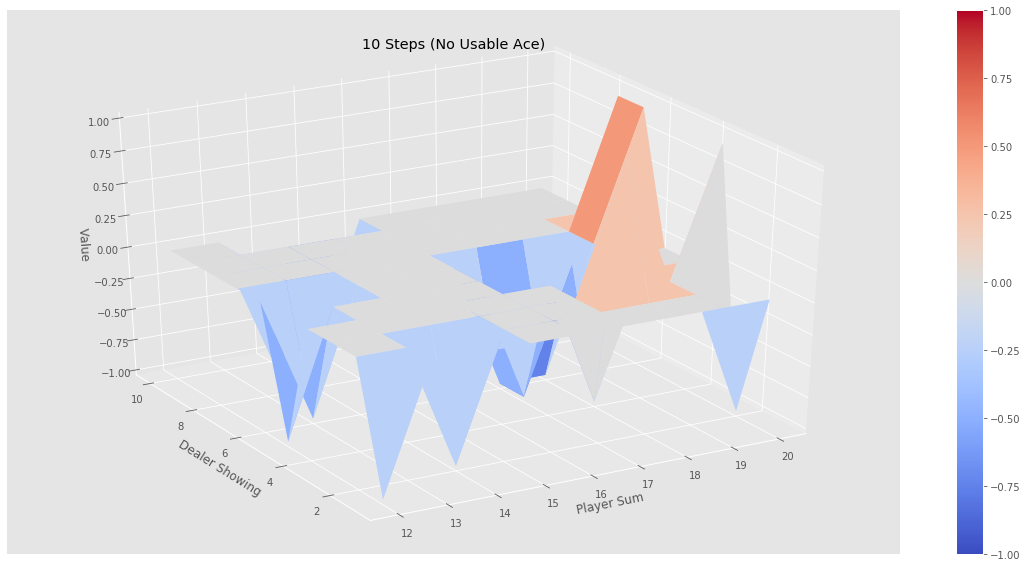

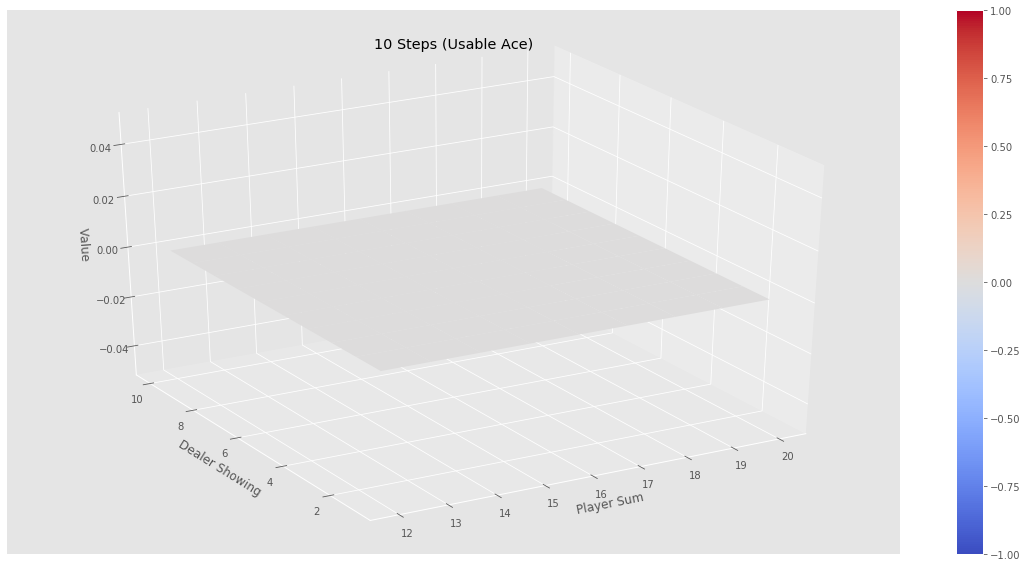

In [130]:
V_10 = mc_prediction(sample_policy, env, num_episodes=10)
plotting.plot_value_function(V_10, title="10 Steps")

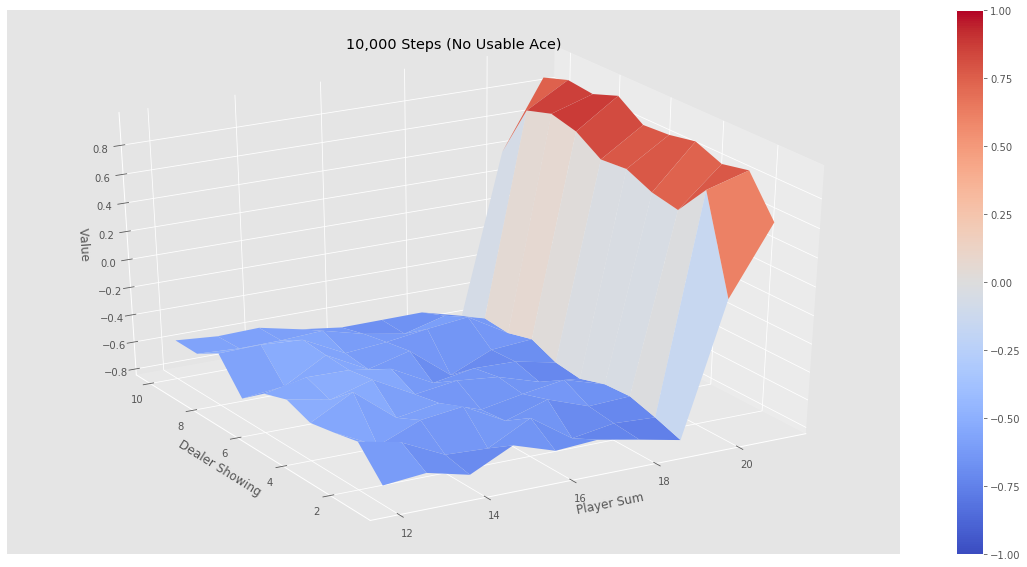

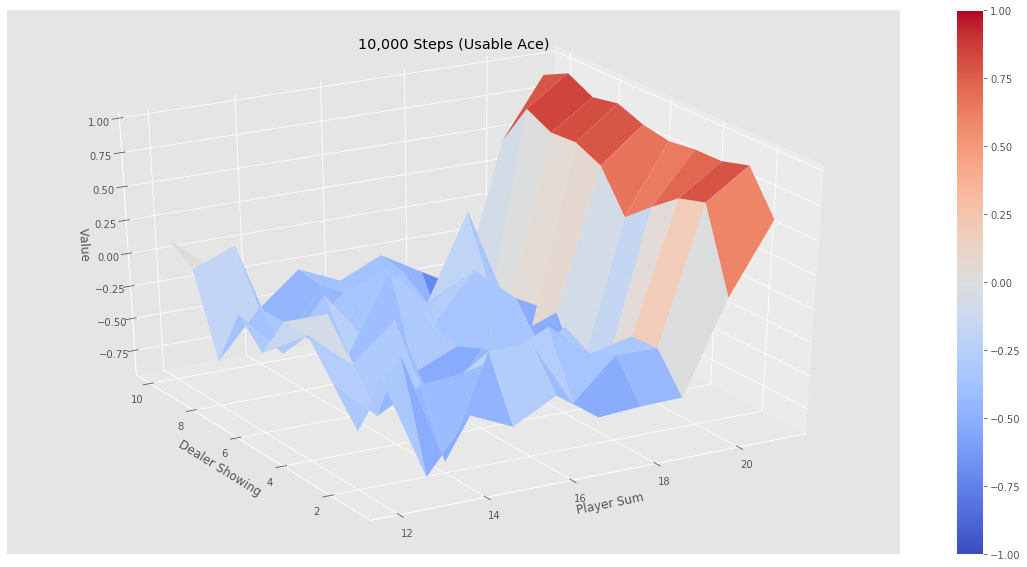

In [131]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

#V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
#plotting.plot_value_function(V_500k, title="500,000 Steps")